In [3]:
import pandas as pd

In [4]:
wti = pd.read_csv("cleaned_wti.csv")
cpi = pd.read_csv("CPI_cleaned.csv")
exch = pd.read_csv("clean_exchange_filled.csv")


In [5]:
print("WTI columns:", wti.columns.tolist())
print("CPI columns:", cpi.columns.tolist())
print("Exchange columns:", exch.columns.tolist())

print("\nWTI sample:\n", wti.head())
print("\nCPI sample:\n", cpi.head())
print("\nExchange sample:\n", exch.head())

WTI columns: ['Date', 'ล่าสุด', 'ราคาเปิด', 'สูงสุด', 'ต่ำสุด', 'ปริมาณ', '% เปลี่ยน']
CPI columns: ['Date', 'CPI']
Exchange columns: ['Date', 'ซื้อตั๋วเงิน', 'ซื้อเงินโอน', 'อัตราขาย']

WTI sample:
          Date     ล่าสุด   ราคาเปิด     สูงสุด     ต่ำสุด    ปริมาณ  % เปลี่ยน
0  2020-01-01  61.330000  61.520000  61.540000  61.330000  101520.0   0.920000
1  2020-01-02  60.950000  61.290000  61.320000  60.420000  101520.0  -0.620000
2  2020-01-03  62.820000  60.960000  63.800000  60.910000  236060.0   3.070000
3  2020-01-04  62.893333  61.783333  64.016667  61.416667  216370.0   2.163333
4  2020-01-05  62.966667  62.606667  64.233333  61.923333  196680.0   1.256667

CPI sample:
          Date    CPI
0  2020-01-31  92.90
1  2020-02-29  92.83
2  2020-03-31  92.03
3  2020-04-30  90.16
4  2020-05-31  90.17

Exchange sample:
          Date  ซื้อตั๋วเงิน  ซื้อเงินโอน  อัตราขาย
0  2020-01-01       29.8406    29.931500   30.2826
1  2020-01-02       29.8406    29.931500   30.2826
2  2020-01-03 

In [6]:
wti = wti.rename(columns={"ล่าสุด": "WTI"})[["Date", "WTI"]]
cpi = cpi.rename(columns={"CPI": "CPI"})[["Date", "CPI"]]
exch = exch.rename(columns={"อัตราขาย": "Exchange"})[["Date", "Exchange"]]

In [7]:
for df in [wti, cpi, exch]: #แปลง Date ให้เป็น datetime
    df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = wti.merge(cpi, on="Date", how="inner") #รวมทั้งหมด 
df = df.merge(exch, on="Date", how="inner")

In [9]:
df.sort_values(by=["Date"]).reset_index(drop=True)
df

,Date,WTI,CPI,Exchange
0,2020-01-31,51.680000,92.90,31.295900
1,2020-02-29,45.600000,92.83,31.706500
2,2020-03-31,24.510000,92.03,32.829800
3,2020-04-30,21.850000,90.16,32.545800
4,2020-05-31,35.806667,90.17,31.951200
5,2020-06-30,39.340000,91.58,31.065800
6,2020-07-31,40.570000,92.19,31.433700
7,2020-08-31,42.900000,92.46,31.250600
8,2020-09-30,40.470000,92.36,31.825800
9,2020-10-31,36.493333,92.40,31.358833


In [10]:
df["Year"] = df["Date"].dt.year #สร้าง Year, Month มิติสำหรับ OLAP
df["Month"] = df["Date"].dt.month

In [11]:
df.head()

,Date,WTI,CPI,Exchange,Year,Month
0,2020-01-31,51.680000,92.90,31.2959,2020,1
1,2020-02-29,45.600000,92.83,31.7065,2020,2
2,2020-03-31,24.510000,92.03,32.8298,2020,3
3,2020-04-30,21.850000,90.16,32.5458,2020,4
4,2020-05-31,35.806667,90.17,31.9512,2020,5


In [12]:
cube = pd.pivot_table(
    df,
    values=["WTI", "CPI", "Exchange"],
    index=["Year", "Month"],   # มิติ
    aggfunc="mean"             # ค่าเฉลี่ย
)

cube

CPI   Exchange         WTI
Year Month                               
2020 1       92.90  31.295900   51.680000
     2       92.83  31.706500   45.600000
     3       92.03  32.829800   24.510000
     4       90.16  32.545800   21.850000
     5       90.17  31.951200   35.806667
     6       91.58  31.065800   39.340000
     7       92.19  31.433700   40.570000
     8       92.46  31.250600   42.900000
     9       92.36  31.825800   40.470000
     10      92.40  31.358833   36.493333
     11      92.36  30.452000   45.510000
     12      92.50  30.185720   48.630000
2021 1       92.59  30.113533   52.973333
     2       91.74  30.445175   60.690000
     3       91.95  31.505200   59.180000
     4       93.22  31.369200   63.480000
     5       92.37  31.438400   66.960000
     6       92.72  32.221900   72.770000
     7       92.61  33.099733   72.356667
     8       92.44  32.552100   68.260000
     9       93.91  34.090800   74.700000
     10      94.60  33.486200   82.226667
     11      94.87  33.856900   65.850000
     12      94.51  33.569200   74.880000
2022 1       95.58  33.600300   86.490000
     2       96.58  32.891700   93.500000
     3       97.23  33.455300   98.520000
     4       97.56  34.531750  103.100000
     5       98.92  34.356800  111.910000
     6       99.81  35.463800  103.100000
     7       99.66  36.509280   93.843333
     8       99.70  36.640400   89.030000
     9       99.92  38.067900   78.720000
     10     100.26  38.193700   85.400000
     11     100.13  35.535200   80.660000
     12     100.08  34.690775   80.456667
2023 1      100.37  32.952400   79.170000
     2      100.25  35.315500   77.190000
     3       99.99  34.263100   75.800000
     4      100.17  34.321400   75.876667
     5       99.45  34.895300   68.240000
     6      100.05  35.748900   70.780000
     7      100.04  34.411100   81.320000
     8      100.58  35.095600   82.960000
     9      100.22  36.795267   88.256667
     10      99.94  36.163100   80.500000
     11      99.70  35.108700   76.050000
     12      99.24  34.403620   71.926667
2024 1       99.26  35.594400   75.710000
     2       99.48  36.095900   77.450000
     3       99.51  36.562467   82.720000
     4      100.36  37.224600   81.280000
     5      100.98  36.891400   76.730000
     6      100.67  36.930700   81.760000
     7      100.86  35.915300   76.840000
     8      100.94  34.190433   72.815000
     9      100.84  32.456300   67.770000
     10     100.77  33.913500   68.810000
     11     100.64  34.513667   67.760000
     12     100.47  34.146100   71.250000

In [13]:
# จาก month -> year (ค่าเฉลี่ยรายปี)
rollup = df.groupby("Year")[["WTI", "CPI", "Exchange"]].mean()
print("Roll-up (Year Level)")
print(rollup)

Roll-up (Year Level)
            WTI         CPI   Exchange
Year                                  
2020  39.446667   91.995000  31.491804
2021  67.860556   93.127500  32.312362
2022  92.060833   98.785833  35.328075
2023  77.339167  100.000000  34.956166
2024  75.074583  100.398333  35.369564


In [14]:
# เจาะดูปี 2024 -> เดือน
drilldown = df[df["Year"] == 2024].groupby(["Year","Month"])[["WTI","CPI","Exchange"]].mean()
print("Drill-down (Year 2024 by Month)")
print(drilldown)


Drill-down (Year 2024 by Month)
               WTI     CPI   Exchange
Year Month                           
2024 1      75.710   99.26  35.594400
     2      77.450   99.48  36.095900
     3      82.720   99.51  36.562467
     4      81.280  100.36  37.224600
     5      76.730  100.98  36.891400
     6      81.760  100.67  36.930700
     7      76.840  100.86  35.915300
     8      72.815  100.94  34.190433
     9      67.770  100.84  32.456300
     10     68.810  100.77  33.913500
     11     67.760  100.64  34.513667
     12     71.250  100.47  34.146100


In [15]:
# เลือกปีเดียว เช่น 2023
slice_2023 = df[df["Year"] == 2023]
print("Slice (Only Year 2023)")
# print(slice_2023.head())
slice_2023

Slice (Only Year 2023)


,Date,WTI,CPI,Exchange,Year,Month
36,2023-01-31,79.170000,100.37,32.952400,2023,1
37,2023-02-28,77.190000,100.25,35.315500,2023,2
38,2023-03-31,75.800000,99.99,34.263100,2023,3
39,2023-04-30,75.876667,100.17,34.321400,2023,4
40,2023-05-31,68.240000,99.45,34.895300,2023,5
41,2023-06-30,70.780000,100.05,35.748900,2023,6
42,2023-07-31,81.320000,100.04,34.411100,2023,7
43,2023-08-31,82.960000,100.58,35.095600,2023,8
44,2023-09-30,88.256667,100.22,36.795267,2023,9
45,2023-10-31,80.500000,99.94,36.163100,2023,10


In [16]:
# เลือกช่วงปี + เดือน เช่น 2023–2024 และเดือน 1–6
dice = df[(df["Year"].between(2023, 2024)) & (df["Month"].between(1, 6))]
print("Dice (Year 2023–2024, Month 1–6)")
# print(dice.head())
dice

Dice (Year 2023–2024, Month 1–6)


,Date,WTI,CPI,Exchange,Year,Month
36,2023-01-31,79.170000,100.37,32.952400,2023,1
37,2023-02-28,77.190000,100.25,35.315500,2023,2
38,2023-03-31,75.800000,99.99,34.263100,2023,3
39,2023-04-30,75.876667,100.17,34.321400,2023,4
40,2023-05-31,68.240000,99.45,34.895300,2023,5
41,2023-06-30,70.780000,100.05,35.748900,2023,6
48,2024-01-31,75.710000,99.26,35.594400,2024,1
49,2024-02-29,77.450000,99.48,36.095900,2024,2
50,2024-03-31,82.720000,99.51,36.562467,2024,3
51,2024-04-30,81.280000,100.36,37.224600,2024,4


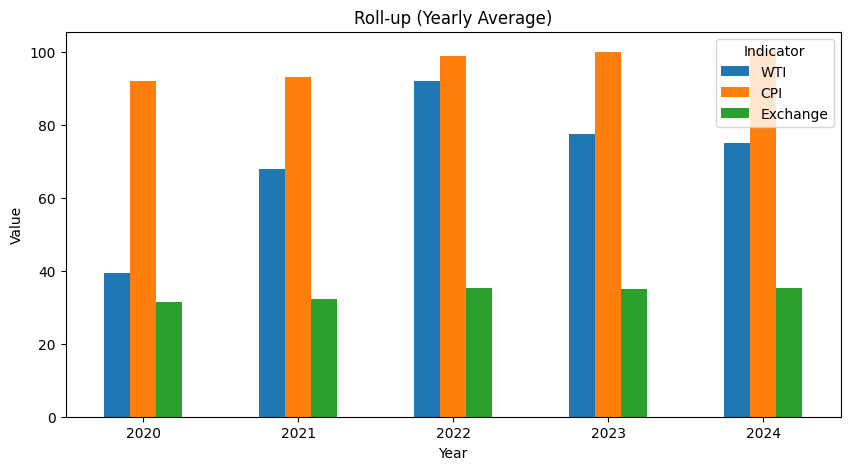

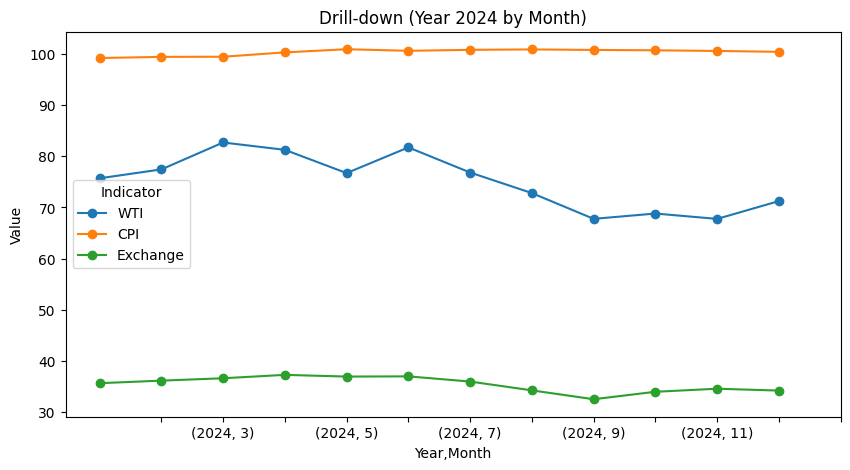

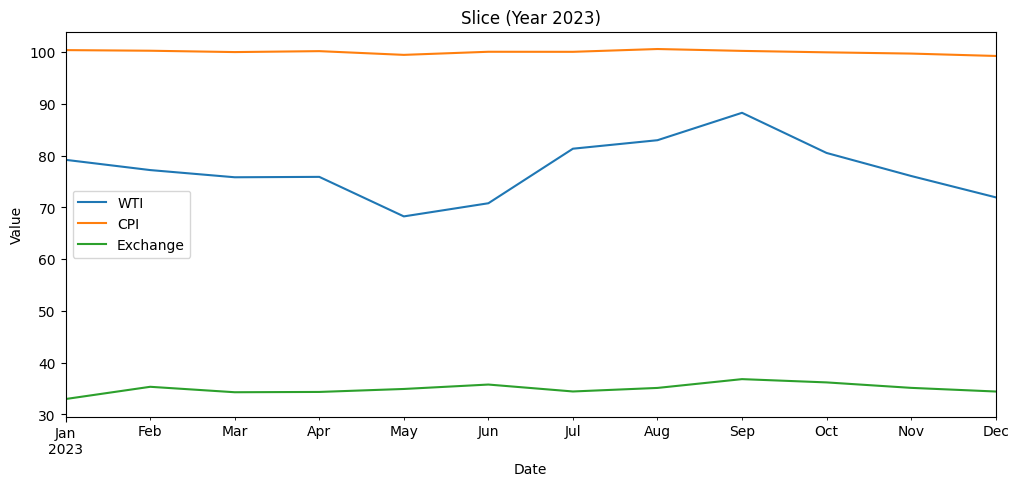

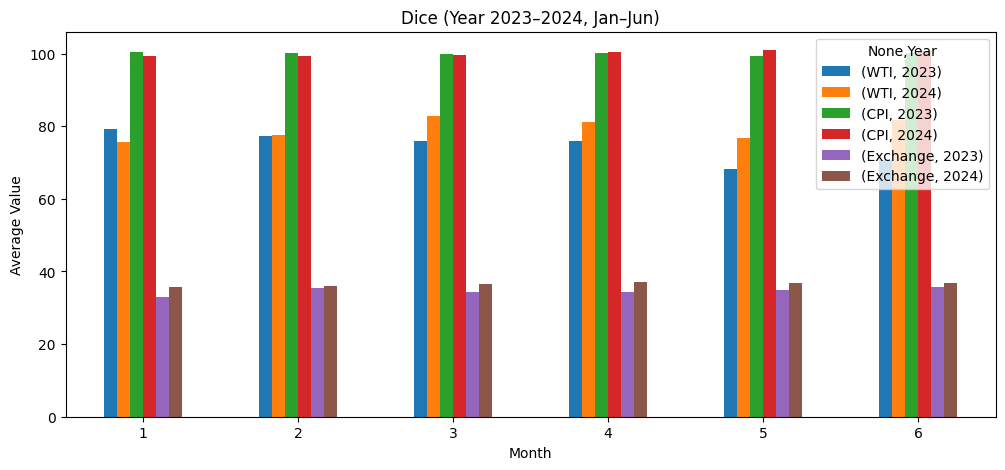

In [17]:
import matplotlib.pyplot as plt

# ==== Roll-up: Yearly Average ====
rollup = df.groupby("Year")[["WTI", "CPI", "Exchange"]].mean()

rollup.plot(kind="bar", figsize=(10, 5))
plt.title("Roll-up (Yearly Average)")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.legend(title="Indicator")
plt.show()

# ==== Drill-down: 2024 Monthly ====
drilldown = df[df["Year"] == 2024].groupby(["Year", "Month"])[["WTI", "CPI", "Exchange"]].mean()

drilldown.plot(kind="line", marker="o", figsize=(10, 5))
plt.title("Drill-down (Year 2024 by Month)")
plt.ylabel("Value")
plt.xticks(drilldown.index.get_level_values("Month"))
plt.legend(title="Indicator")
plt.show()

# ==== Slice: Only 2023 ====
slice_2023 = df[df["Year"] == 2023]

slice_2023.set_index("Date")[["WTI", "CPI", "Exchange"]].plot(figsize=(12, 5))
plt.title("Slice (Year 2023)")
plt.ylabel("Value")
plt.show()

# ==== Dice: 2023–2024, Jan–Jun ====
dice = df[(df["Year"].between(2023, 2024)) & (df["Month"].between(1, 6))]

dice.groupby(["Year","Month"])[["WTI","CPI","Exchange"]].mean().unstack("Year").plot(kind="bar", figsize=(12, 5))
plt.title("Dice (Year 2023–2024, Jan–Jun)")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()

In [68]:
df = wti.merge(cpi, on="Date", how="inner") #รวมทั้งหมด 
df = df.merge(exch, on="Date", how="inner")

In [70]:
df

,Date,WTI,CPI,Exchange
0,2020-01-31,51.680000,92.90,31.295900
1,2020-02-29,45.600000,92.83,31.706500
2,2020-03-31,24.510000,92.03,32.829800
3,2020-04-30,21.850000,90.16,32.545800
4,2020-05-31,35.806667,90.17,31.951200
5,2020-06-30,39.340000,91.58,31.065800
6,2020-07-31,40.570000,92.19,31.433700
7,2020-08-31,42.900000,92.46,31.250600
8,2020-09-30,40.470000,92.36,31.825800
9,2020-10-31,36.493333,92.40,31.358833


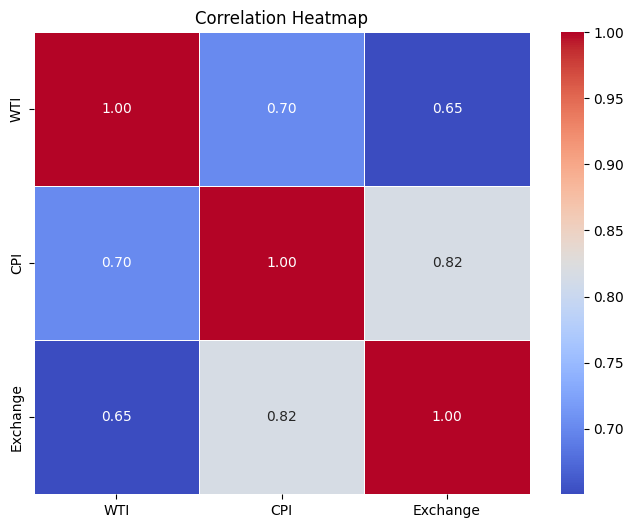

In [74]:
import seaborn as sns
df=df.drop("Date",axis=1)
df.corr()
matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [79]:
from scipy.stats import pearsonr
pearsonr(df['WTI'], df['CPI'])


PearsonRResult(statistic=np.float64(0.7017229417175828), pvalue=np.float64(4.2146922179923817e-10))

In [77]:
pearsonr(df['WTI'], df['Exchange'])

PearsonRResult(statistic=np.float64(0.6503476508889116), pvalue=np.float64(1.8662437437874607e-08))

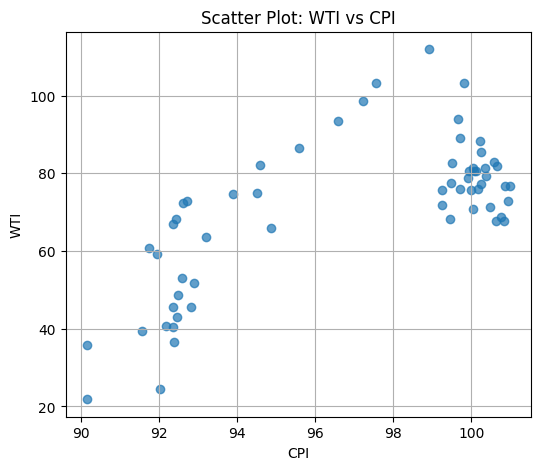

In [84]:
plt.figure(figsize=(6,5))
plt.scatter(df['CPI'], df['WTI'], alpha=0.7)
plt.xlabel('CPI')
plt.ylabel('WTI')
plt.title('Scatter Plot: WTI vs CPI')
plt.grid(True)
plt.show()

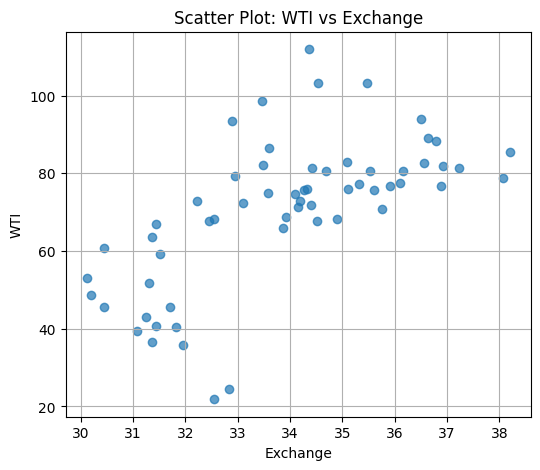

In [86]:
plt.figure(figsize=(6,5))
plt.scatter(df['Exchange'], df['WTI'], alpha=0.7 )
plt.xlabel('Exchange')
plt.ylabel('WTI')
plt.title('Scatter Plot: WTI vs Exchange')
plt.grid(True)
plt.show()

3.592380358167289 -277.60639022145017 0.7017229417175828


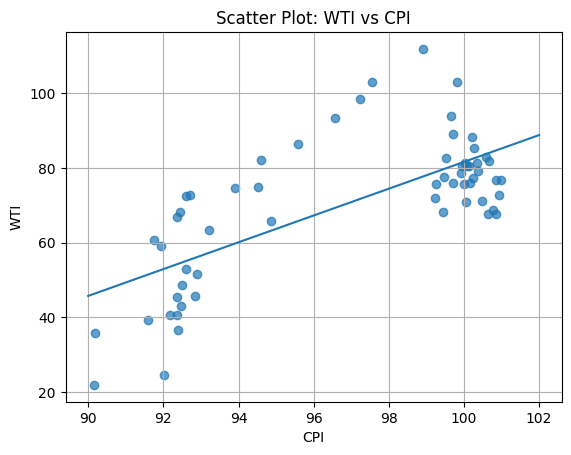

In [101]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df["CPI"], df["WTI"])
print(slope,intercept,r)
plt.scatter(df['CPI'], df['WTI'], alpha=0.7)
plt.xlabel('CPI')
plt.ylabel('WTI')
plt.plot([i for i in range(90,103)],list(map(lambda y: slope*y + intercept,[i for i in range(90,103)])))
plt.title('Scatter Plot: WTI vs CPI')
plt.grid(True)
plt.show()

5.927844390402709 -130.54773558089374 0.650347650888912


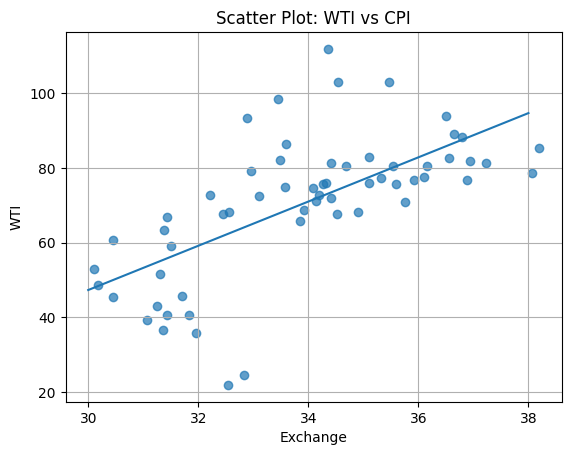

In [103]:
slope, intercept, r, p, std_err = stats.linregress(df["Exchange"], df["WTI"])
print(slope,intercept,r)
plt.scatter(df['Exchange'], df['WTI'], alpha=0.7)
plt.xlabel('Exchange')
plt.ylabel('WTI')
plt.plot([i for i in range(30,39)],list(map(lambda y: slope*y + intercept,[i for i in range(30,39)])))
plt.title('Scatter Plot: WTI vs CPI')
plt.grid(True)
plt.show()